In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import backend as k
import os
import sklearn
import wave
import resampy
import IPython.display as ipdpip

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.io import wavfile
import scipy.io

In [3]:
train_audio_path = 'train\classes'
labels=os.listdir(train_audio_path)

In [4]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav)
        print(len(samples))

        if(len(samples)== 154350) : 
            all_wave.append(samples)
            all_label.append(label)

belly_pain
151263
154350
154350
154350
154350
154350
154350
154350
154350
154350
152145
153468
154350
150381
150822
150822
burping
146853
154350
154350
154350
154350
154350
144207
154350
discomfort
154350
154350
154350
154350
154350
154350
154350
146853
147294
154350
154350
154350
152145
153468
152145
152145
152145
152145
152145
153468
152145
154350
150381
150822
150822
146853
155673
111485
139709
115719
142532
170756
111485
141120
169344
115719
110250
110250
110250
110250
110250
110250
110250
110250
110250
110250
110074
111485
111485
111485
111485
110544
110544
111015
110544
110544
hungry
153027
152145
153468
153909
154350
152145
153468
154350
154350
154350
154350
154350
154350
150822
153027
153468
154350
153468
154350
153468
154350
154350
154350
154350
154350
154350
151263
151263
151263
154350
149499
152586
152586
151704
151263
146853
152145
152145
151263
148176
154350
155232
155673
151263
151704
153468
154350
154350
154350
151704
152586
151263
151263
153909
152586
153468
153027
1481

In [5]:
print(sample_rate)
print(samples)

22050
[ 1.2662281e-06  1.4249257e-06 -1.5742867e-08 ...  1.6795032e-04
  9.0829097e-05  3.4692133e-05]


In [6]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

181
(154350,)


array([-0.001212  , -0.00145916, -0.00125864, ...,  0.00095171,
        0.00116718,  0.0007323 ], dtype=float32)

In [7]:
len(set(all_label))

5

In [8]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [9]:


classes

['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

In [10]:
y=np_utils.to_categorical(y, num_classes=len(labels))

In [11]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [12]:
y.shape

(181, 5)

In [13]:
all_wave = np.array(all_wave).reshape(-1,154350,1)

In [14]:
all_wave.shape

(181, 154350, 1)

In [15]:
len(labels)

5

In [16]:
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [17]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

In [18]:
inputs = Input(shape=(154350,1))

#First Conv1D layer
conv = Conv1D(filters=8,kernel_size=13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)
outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 154350, 1)]       0         
                                                                 
 conv1d (Conv1D)             (None, 154338, 8)         112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 51446, 8)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 51446, 8)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 51436, 16)         1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 17145, 16)        0         
 1D)                                                         

In [19]:
print(len(labels))

5


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history=model.fit(x_tr, y_tr ,epochs=100 , batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
5/5 [==============================] - 15s 3s/step - loss: 1.1203e-05 - accuracy: 1.0000 - val_loss: 6.6315 - val_accuracy: 0.6757
Epoch 2/100
5/5 [==============================] - 13s 3s/step - loss: 5.5083e-05 - accuracy: 1.0000 - val_loss: 6.6472 - val_accuracy: 0.6757
Epoch 3/100
5/5 [==============================] - 12s 2s/step - loss: 1.2242e-04 - accuracy: 1.0000 - val_loss: 6.6645 - val_accuracy: 0.6757
Epoch 4/100
5/5 [==============================] - 12s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 6.8769 - val_accuracy: 0.6486
Epoch 5/100
5/5 [==============================] - 12s 2s/step - loss: 0.0136 - accuracy: 0.9931 - val_loss: 8.1779 - val_accuracy: 0.7027
Epoch 6/100
5/5 [==============================] - 13s 3s/step - loss: 2.5858e-04 - accuracy: 1.0000 - val_loss: 9.5825 - val_accuracy: 0.7297
Epoch 7/100
5/5 [==============================] - 12s 2s/step - loss: 0.0393 - accuracy: 0.9931 - val_loss: 9.7007 - val_accuracy: 0.7297
Epoch 8/100

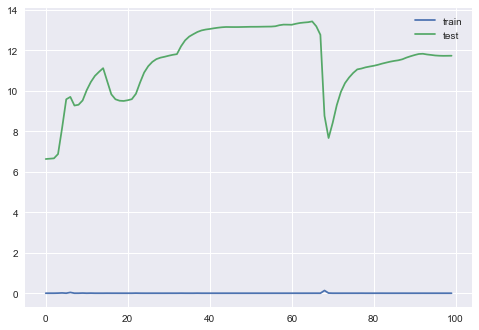

In [27]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [28]:
print("Evaluation: ")
mse, acc=model.evaluate(x_val,y_val)
print("Mean Square Error:",mse)
print("Accuracy:",acc)

Evaluation: 
2/2 [==============================] - 1s 105ms/step - loss: 11.7356 - accuracy: 0.7297
Mean Square Error: 11.735611915588379
Accuracy: 0.7297297120094299


In [29]:
model.save('my_model.h5') 